In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

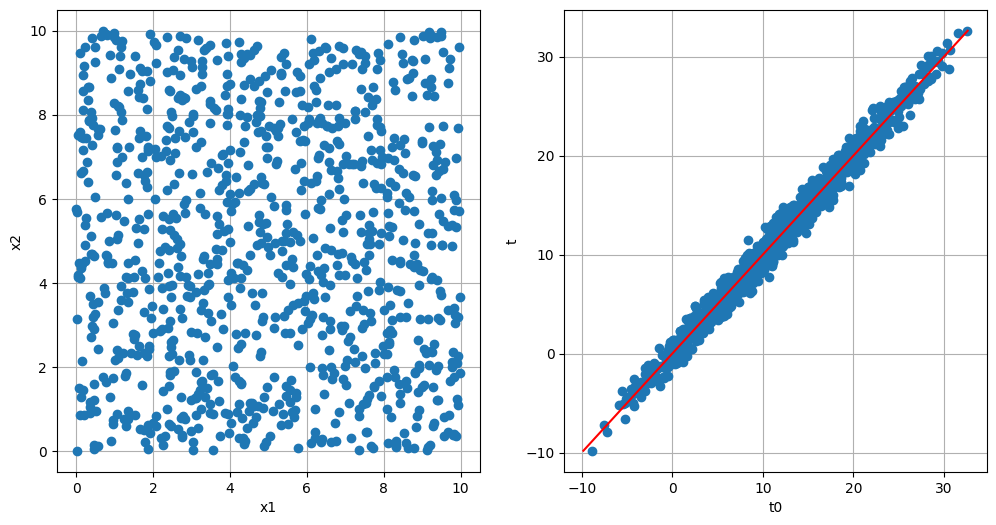

Error esperado = 1031.081391


In [10]:
# Parametros:
d = 5 # Dimension del problema
w = np.random.randn(d, 1)
b = 1.0
xmin = 0.0
xmax = 10.0
noise = 1.0
n = 1000

# Datos del problema generados al azar:
x = xmin + np.random.rand(d, n)*(xmax - xmin)
t0 = np.dot(w.T,x) + b 
t = t0 + np.random.randn(n)*noise
tmin = np.min(t)
tmax = np.max(t)

# Distribucion de las dos primeras variables:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x[0,:], x[1,:], 'o')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(122)

# Grafica de t frente a t0:
plt.plot(t0[0], t[0], 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t0")
plt.ylabel("t")
plt.show()

# Error esperado:
e = np.sum((t-t0)*(t-t0))
print("Error esperado = %f" % e)

In [11]:
x = tf.constant(x)
t = tf.constant(t)

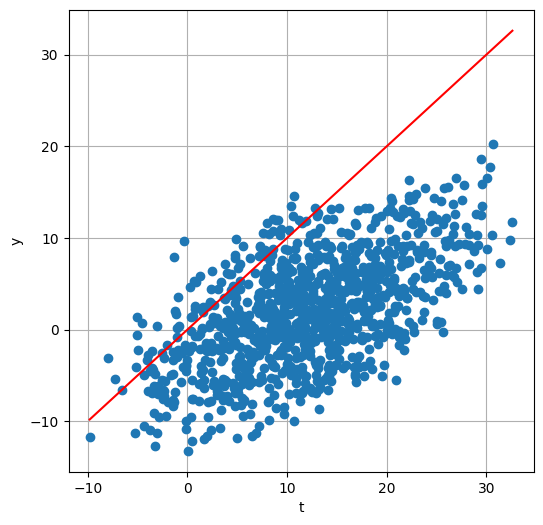

Error = 141725.161147


In [12]:
w = tf.Variable(tf.random.normal(shape=[d, 1], dtype=tf.dtypes.float64))  
b = tf.Variable(tf.random.normal(shape=[1], dtype=tf.dtypes.float64)) 

# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
# tf.matmul y @ son equivalentes:
#y = tf.matmul(tf.transpose(w), x) + b
y = tf.transpose(w)@x + b

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t[0], y[0], 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = np.sum((y-t)*(y-t))  
print("Error = %f" % e)

In [13]:
nepocas = 64
eta = 0.005

error = []
for i in range(nepocas):
  # Definicion del grafo:
  # Ojo, persistent = True porque vamos a calcular gradientes respecto a mas de 
  # una variable (vamos a llamar varias veces a tape.gradient)
  with tf.GradientTape(persistent=True) as tape: 
    # Calculo de la salida y:
    # TO-DO - tf.matmul y @ son equivalentes:
    y = tf.transpose(w)@x + b

    # Calculo de la funcion de coste:
    loss = tf.reduce_mean((y - t)**2)

  error.append(loss.numpy())
  
  # Calculo de los gradientes:
  # TO-DO
  dw = tape.gradient(loss, w) 
  db = tape.gradient(loss, b)
  # [dw, db] = tape.gradient(loss, [w, b]) 
  
  # Actualizacion de los parametros:
  # TO-DO (ojo assign)
  new_w = w - eta*dw 
  new_b = b - eta*db 
  w.assign(new_w)
  b.assign(new_b)

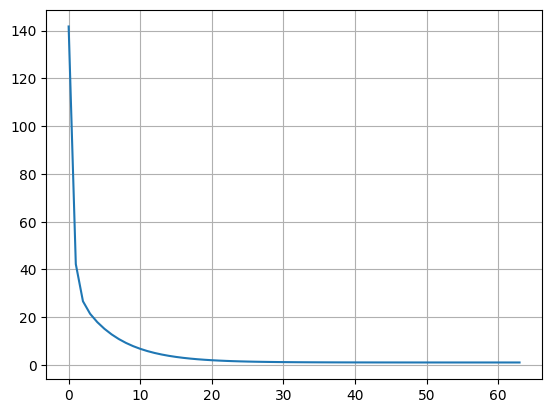

In [14]:
plt.plot(error)
plt.grid(True)
plt.show()

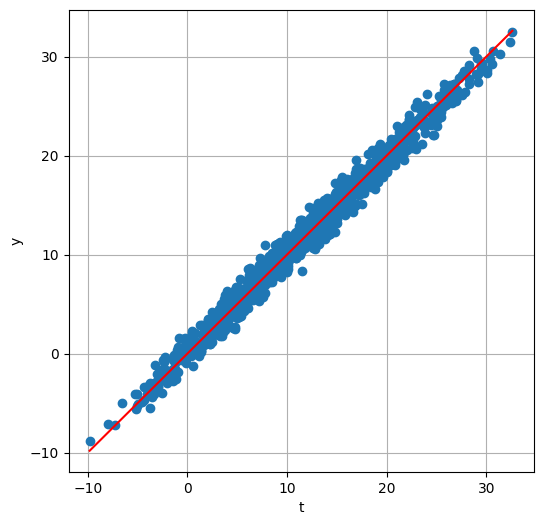

Error = 1051.218785


In [15]:
# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
y = tf.matmul(tf.transpose(w), x) + b

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t[0], y[0], 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = np.sum((y-t)*(y-t))  
print("Error = %f" % e)